Mean: 0.350528813281409
1σ bounds: 0.33939050245512237, 0.36163212742318085
2σ bounds: 0.3287467419957864, 0.37286213256067763


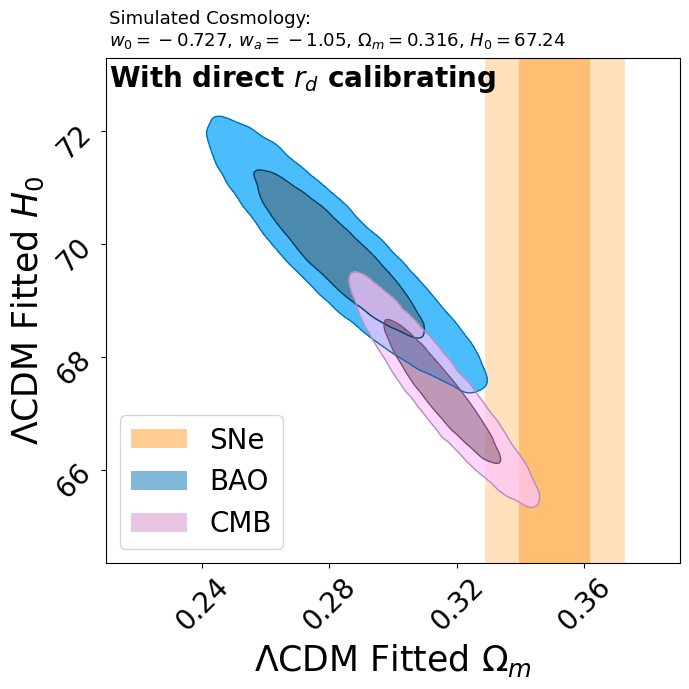

In [4]:
import pickle
import numpy as np


with open('data/samples_sne_combined_with_cov.pkl', 'rb') as f:
    samples_sne_combined_with_cov = pickle.load(f)
    
with open('data/cmbonly_new_figure1.npy', 'rb') as f:
    cmbonly = np.load(f)
    
with open('data/samples_bao_combined_new_figure1_desi_gaussian.npy', 'rb') as f:
    samples_bao_combined_desi_gaussian = np.load(f)
    
with open('data/samples_sne_combined_with_cov.pkl', 'rb') as f:
    samples_sne_combined_with_cov = pickle.load(f)
    
samples_first_column = samples_sne_combined_with_cov[:, 0]

mean_value = np.mean(samples_first_column)
one_sigma_lower, one_sigma_upper = np.percentile(samples_first_column, [16, 84])

two_sigma_lower, two_sigma_upper = np.percentile(samples_first_column, [2.5, 97.5])

print(f"Mean: {mean_value}")
print(f"1σ bounds: {one_sigma_lower}, {one_sigma_upper}")
print(f"2σ bounds: {two_sigma_lower}, {two_sigma_upper}")

import numpy as np
import pandas as pd
from chainconsumer import Chain, ChainConsumer, PlotConfig
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

samples_bao_combined_df_desi_gaussian = pd.DataFrame(samples_bao_combined_desi_gaussian, columns=["$\Omega_m$", "$H_0$"])
cmbonly_df = pd.DataFrame(cmbonly, columns=["$\Omega_m$", "$H_0$"])

c = ChainConsumer()

c.add_chain(Chain(samples=samples_bao_combined_df_desi_gaussian, name="BAO like",color='#0173b2'))
c.add_chain(Chain(samples=cmbonly_df, name="CMB like",color='#d38cc6'))

plot_config = PlotConfig(
    summary=True,
    bins=1.5,
    smooth=1,
    plot_hists=False,
    shade=True,
    bar_shade=True,
    sigmas=[0, 1],
)
c.set_plot_config(plot_config)

fig = c.plotter.plot(figsize="column")
ax = fig.get_axes()[0]

omega_m_sne_mean = mean_value
#omega_m_sne_err = 0.012
omega_m_1sigma_min = one_sigma_lower
omega_m_1sigma_max = one_sigma_upper
omega_m_2sigma_min = two_sigma_lower
omega_m_2sigma_max = two_sigma_upper

h0_min, h0_max = ax.get_ylim()

rect_2sigma = Rectangle(
    (omega_m_2sigma_min, h0_min),
    omega_m_2sigma_max - omega_m_2sigma_min,
    h0_max - h0_min,
    facecolor='#ff9d27',
    alpha=0.3,
    edgecolor='none'
)
ax.add_patch(rect_2sigma)

rect_1sigma = Rectangle(
    (omega_m_1sigma_min, h0_min),
    omega_m_1sigma_max - omega_m_1sigma_min,
    h0_max - h0_min,
    facecolor='#ff9d27',
    alpha=0.5,
    label='SNe',
    edgecolor='none'
)

rect_333sigma = Rectangle(
    (0, 0),
    omega_m_1sigma_max - omega_m_1sigma_min,
    h0_max - h0_min,
    facecolor='#0072B2',
    alpha=0.5,
    label='BAO',
    edgecolor='none'
)
rect_444sigma = Rectangle(
    (0, 0),
    omega_m_1sigma_max - omega_m_1sigma_min,
    h0_max - h0_min,
    facecolor='#d38cc6',
    alpha=0.5,
    label='CMB',
    edgecolor='none'
)
ax.add_patch(rect_1sigma)
ax.add_patch(rect_333sigma)
ax.add_patch(rect_444sigma)

ax.set_xlim(0.21, 0.39)

ax.legend(loc='lower left', fontsize=20)

ax.set_xlabel("$\Lambda$CDM Fitted $\Omega_m$", fontsize=25)
ax.set_ylabel("$\Lambda$CDM Fitted $H_0$", fontsize=25)
ax.text(
    0.211, 73.5,
    "Simulated Cosmology:\n$w_0=-0.727$, $w_a=-1.05$, $\\Omega_m=0.316$, $H_0=67.24$",
    fontsize=13,
    ha='left'
)

ax.text(
    0.211, 73.2, "With direct $r_d$ calibrating",  # Adjust (x, y) for positioning
    fontsize=20, color='black', weight='bold', ha='left', va='top'
)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.grid(False)

ax.grid(False)

plt.tight_layout()
fig.savefig('bestw0wa_to_lcdm_desi_gaussian.png', dpi=500)
plt.show()


Peak for BAO with prior on $\Omega_b h^2$: x = 67.55, y = 0.2618
Peak for BAO with direct $r_d$ calibrating: x = 68.07, y = 0.2415


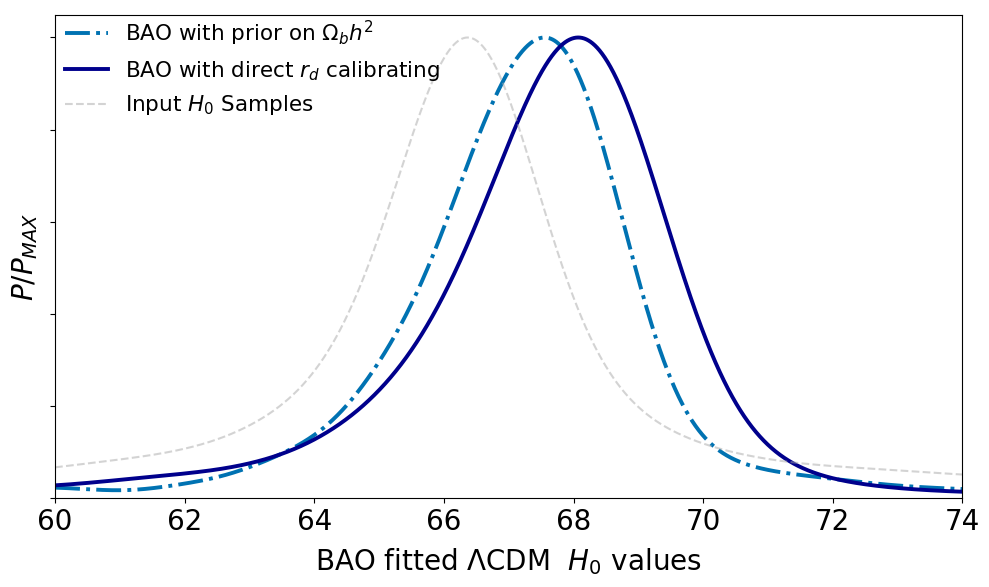

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

# Assuming your data lists are defined:
# h0_min_bao, h0_std_bao, h0_min_cmb, h0_std_cmb, h0_oringinal_list_with_cmb

import pickle

with open('data/results_for_h_omm_with_snecov_correct_obh2.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

h0_min_sne = loaded_results["h0_min_sne"]
omm_min_sne = loaded_results["omm_min_sne"]
h0_std_sne = loaded_results["h0_std_sne"]
omm_std_sne = loaded_results["omm_std_sne"]
h0_min_bao = loaded_results["h0_min_bao"]
omm_min_bao = loaded_results["omm_min_bao"]
h0_std_bao = loaded_results["h0_std_bao"]
omm_std_bao = loaded_results["omm_std_bao"]
param = loaded_results["param"]

with open('data/baocmbsne_gaussian_method_results.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

h0_min_bao_with_gaussian = loaded_data['h0_min_bao']
omm_min_bao_with_gaussian = loaded_data['omm_min_bao']
h0_std_bao_with_gaussian = loaded_data['h0_std_bao']
omm_std_bao_with_gaussian = loaded_data['omm_std_bao']


omm_oringinal_list_with_cmb = []
for i in range (len(h0_min_sne)):
    omm_oringinal_with_cmb = param[i][2]
    omm_oringinal_list_with_cmb.append(omm_oringinal_with_cmb)

h0_oringinal_list_with_cmb = []
for i in range (len(h0_min_sne)):
    h0_oringinal_with_cmb = param[i][3]
    h0_oringinal_list_with_cmb.append(h0_oringinal_with_cmb)
    
    import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

# Assuming your data lists are defined:
# h0_min_bao, h0_std_bao, h0_min_cmb, h0_std_cmb, h0_oringinal_list_with_cmb

h0_min_bao_all = np.array(h0_min_bao)
h0_min_bao_all_with_gaussian = np.array(h0_min_bao_with_gaussian)
h0_oringinal_array = np.array(h0_oringinal_list_with_cmb)

ho_std_bao = np.array(h0_std_bao)
ho_std_bao_with_gaussian = np.array(h0_std_bao_with_gaussian)

h0_min_bao_all = h0_min_bao_all[np.isfinite(h0_min_bao_all)]
h0_min_bao_all_with_gaussian = h0_min_bao_all_with_gaussian[np.isfinite(h0_min_bao_all_with_gaussian)]
h0_bao_std = ho_std_bao[np.isfinite(ho_std_bao)]
h0_bao_std_with_gaussian = ho_std_bao_with_gaussian[np.isfinite(ho_std_bao_with_gaussian)]
h0_oringinal_array = h0_oringinal_array[np.isfinite(h0_oringinal_array)]

h0_std_bao = np.array(ho_std_bao)
h0_std_bao_with_gaussian = np.array(ho_std_bao_with_gaussian)

h0_min_bao_all = h0_min_bao_all[np.isfinite(h0_min_bao_all)]
h0_min_bao_all_with_gaussian = h0_min_bao_all_with_gaussian[np.isfinite(h0_min_bao_all_with_gaussian)]
h0_bao_std = h0_std_bao[np.isfinite(h0_std_bao)]
h0_bao_std_with_gaussian = h0_std_bao_with_gaussian[np.isfinite(h0_std_bao_with_gaussian)]
h0_original_array = h0_oringinal_array[np.isfinite(h0_oringinal_array)]

x_values = np.linspace(60, 80, 5000)

kde_h0_original = gaussian_kde(h0_original_array)
peak_h0_original = x_values[np.argmax(kde_h0_original(x_values))]

def calculate_h0_distributions(x, h0_min, h0_std, label, color, linestyle='dashdot'):#'-'):
    total_distribution = np.zeros_like(x)
    for mu, sigma in zip(h0_min, h0_std):
        if not np.isnan(mu) and not np.isnan(sigma):
            total_distribution += norm.pdf(x, mu, sigma)
    dx = x[1] - x[0]
    area = np.sum(total_distribution) * dx
    total_distribution /= area
    total_distribution_plot = total_distribution / np.max(total_distribution)
    plt.plot(x, total_distribution_plot, label=label, color=color, linewidth=2.8, linestyle=linestyle)
    peak_index = np.argmax(total_distribution)
    peak_x_value = x[peak_index]
    peak_y_value = total_distribution[peak_index]
    print(f"Peak for {label}: x = {peak_x_value:.2f}, y = {peak_y_value:.4f}")
    return total_distribution  

plt.figure(figsize=(10, 6))

bao_distribution = calculate_h0_distributions(
    x_values, h0_min_bao_all, h0_bao_std,
    label=r'BAO with prior on $\Omega_b h^2$', color='#0072B2'
)

bao_distribution_with_gaussian = calculate_h0_distributions(
    x_values, h0_min_bao_all_with_gaussian, h0_bao_std_with_gaussian,
    label=r'BAO with direct $r_d$ calibrating', color='#00008c', linestyle='-'#'dashdot'
)


kde_original = kde_h0_original(x_values)
kde_original_plot = kde_original / np.max(kde_original)
plt.plot(
    x_values, kde_original_plot,
    color='#A9A9A9', linestyle='--', label=r"Input $H_0$ Samples", alpha=0.5
)

plt.xlim(60, 74)
plt.ylim(0, None)
plt.xlabel('BAO fitted $\Lambda$CDM  $H_0$ values', fontsize=20)
plt.ylabel('$P/P_{MAX}$', fontsize=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.tick_params(axis='x', labelsize=20)

plt.gca().axes.get_yaxis().set_visible(True)
plt.gca().axes.set_yticklabels([])

plt.legend(fontsize=15.5, loc=(0.001, 0.77), frameon=False)
plt.grid(False)
plt.tight_layout()

plt.savefig("H0_cmb_bao_rdrag.png", dpi=400, bbox_inches='tight')
plt.show()
